<a href="https://colab.research.google.com/github/redddyyashwanth04/machinelearning/blob/main/qoura_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA of qoura

required packages for the eda

In [207]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import seaborn as sns

import zipfile
import pandas as pd

loading the dataset


In [208]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
!pwd

/content


In [210]:
!ls


drive  sample_data


In [211]:
!ls /content/drive/MyDrive/train_q.csv

/content/drive/MyDrive/train_q.csv


In [212]:
df=pd.read_csv("/content/drive/MyDrive/train_q.csv")

In [213]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [215]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [216]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [217]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [218]:
df.duplicated().sum()

np.int64(0)

In [219]:
df.drop_duplicates(inplace=True)

In [220]:
df.dropna(inplace=True)

In [221]:
df.isnull().sum()#all the null values removed from the dataframe

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [222]:
df_dummy = df.copy()
df_dummy['is_duplicate'] = df_dummy['is_duplicate'].map({1: 'Duplicated', 0: 'Not_duplicated'})
duplics = df_dummy['is_duplicate'].value_counts()

In [223]:
print(duplics)
print(type(duplics))

is_duplicate
Not_duplicated    255024
Duplicated        149263
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


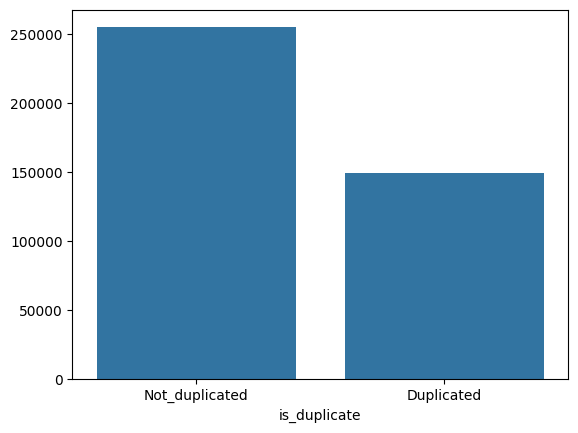

In [224]:
sns.barplot(x=duplics.index, y=duplics.values)
plt.show()

there are more number of non similar questions

In [225]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [226]:
df.shape

(404287, 6)

In [227]:
qids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
unique=qids.unique()
leng_uniq=len(unique)
print(leng_uniq)
print("max no of times a qid occured",max(qids.value_counts()))
print("min no of times a qid occured",min(qids.value_counts()))
print("pecentage of unique ids",leng_uniq/len(qids))

537929
max no of times a qid occured 157
min no of times a qid occured 1
pecentage of unique ids 0.6652810998127567


In [228]:
# print(ds.value_counts()qi)
print(qids.value_counts().index[:2])
x=qids.value_counts()
print(type(x))
print(x.sort_values(ascending=False))

Index([2559, 30782], dtype='int64')
<class 'pandas.core.series.Series'>
2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
497944      1
497916      1
497950      1
497952      1
497924      1
Name: count, Length: 537929, dtype: int64


In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

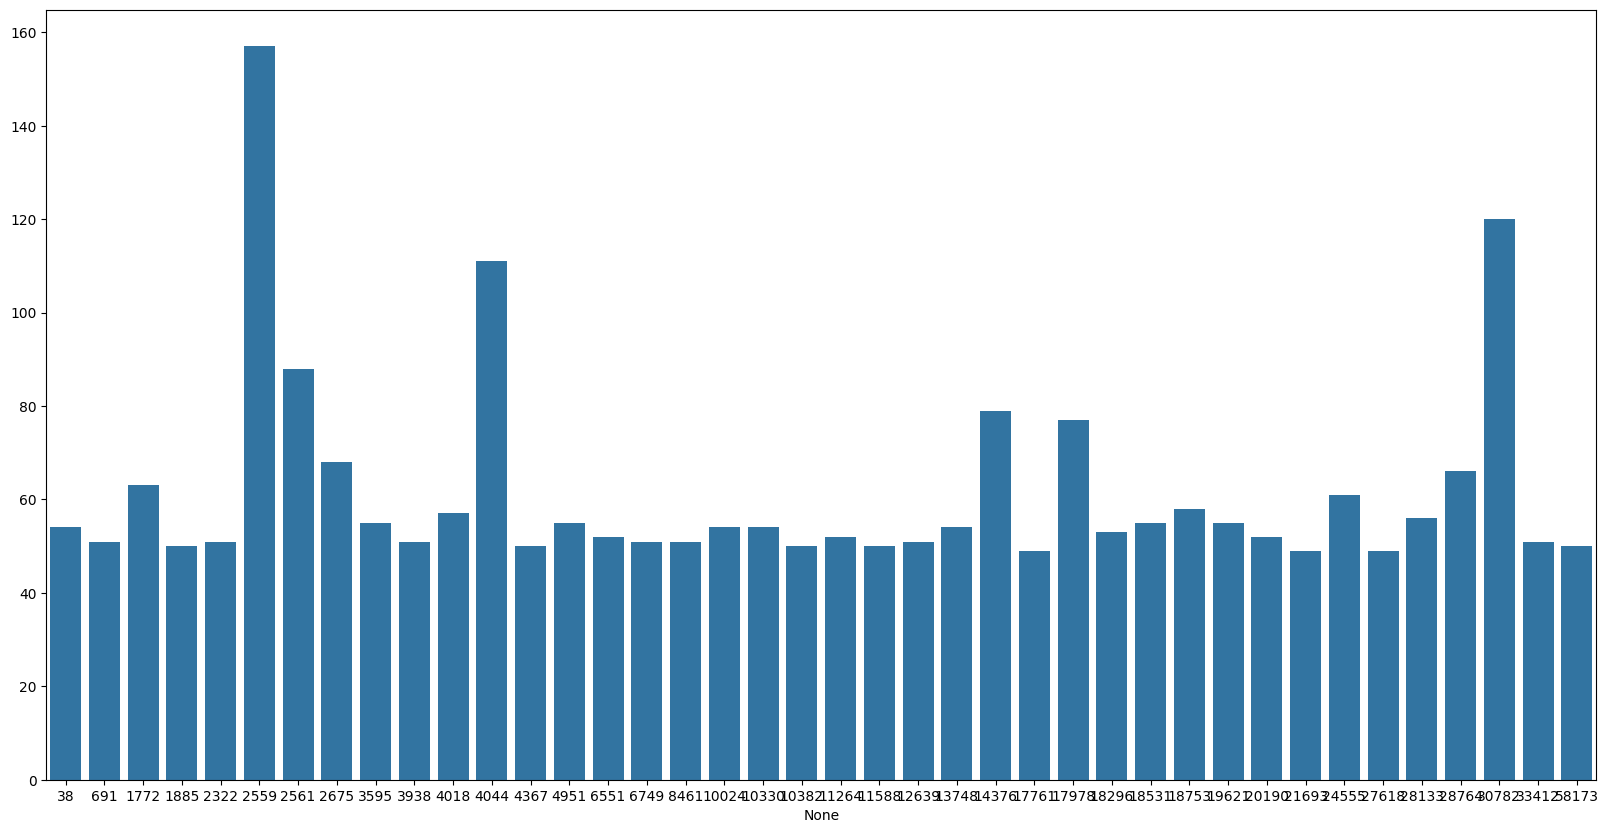

In [230]:
figure_size=(20,10)
plt.figure(figsize=figure_size)
sns.barplot(x=x.index[:40],y= x.values[:40])
plt.show()

In [231]:
# corpus=pd.Series(df[].tolist()+df['question2'].tolist())
# print(corpus)

In [232]:
word_count=corpus.apply(lambda x:len(str(x).split()))
print(word_count)
print(type(word_count))
print("max no of words in a sentence",word_count.max())
print("min no of words in a sentence ",word_count.min())

print("the mean words in sentence",word_count.mean())
print("most no of sentence with max word count",word_count.mode())

0         14
1          8
2         14
3         11
4         13
          ..
808569    13
808570     9
808571     3
808572    25
808573    10
Length: 808574, dtype: int64
<class 'pandas.core.series.Series'>
max no of words in a sentence 237
min no of words in a sentence  1
the mean words in sentence 11.0621365515092
most no of sentence with max word count 0    8
dtype: int64


In [233]:
# prompt: i want to get the sentence id from the word count which max number of word in the sentence

# Assuming 'corpus' is the pandas Series containing the sentences
# from the preceding code

max_word_count = word_count.max()

# Get the index of the sentence(s) with the maximum word count
sentence_id_with_max_words = corpus[word_count == max_word_count].index

print("Sentence ID(s) with the maximum word count:", sentence_id_with_max_words)

Sentence ID(s) with the maximum word count: Index([422342, 456234, 480014, 498763, 522868, 535067, 535939, 571001, 603648,
       641897, 745402, 781929, 801723],
      dtype='int64')


In [234]:
idss=[422342, 456234, 480014, 498763, 522868, 535067, 535939, 571001, 603648,
       641897, 745402, 781929, 801723]


In [235]:
# print("sentence with maximum word count")
# for sentence in hey:
#   print(sentence)

In [236]:
# df.drop(idss,axis=0,inplace=True)

In [237]:
# prompt: drop rows with ids in the dataframe ids are in the list

# df.drop(idss, axis=0, inplace=True)

In [238]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

# Basic Feature Engineering**

In [239]:
df["freq_qid1"]=df.groupby("qid1")["qid1"].transform("count")
df["freq_qid2"]=df.groupby("qid2")["qid2"].transform("count")

In [240]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2'],
      dtype='object')

In [241]:
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [242]:
def normalized_word_Common(row):
  #set is used to store the unique words in the set,

  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)

In [243]:
def normalized_word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

In [244]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total'],
      dtype='object')

these basic features that i have added make the data more enganging and provides better training ablility to the model

# preprocessing


In [245]:

import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [246]:
# prompt: remove the stopwords from the corpus in a function
Stopwords=stopwords.words("english")
def remove_stopwords(text):
  return ' '.join([word for word in str(text).split() if word not in Stopwords])

df['question1'] = df['question1'].apply(remove_stopwords)
df['question2'] = df['question2'].apply(remove_stopwords)

In [247]:

def preprocessing(text):
  text = str(text).lower()#this is important which converts the series into text(error i got while writing)
  # text=text.lower()
  text = str(text).lower()
  text= text.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
  text= re.sub(r"([0-9]+)000000", r"\1m", text)
  text= re.sub(r"([0-9]+)000", r"\1k", text)
  porter = PorterStemmer()
  pattern = re.compile('\W')
  if type(text) == type(''):
      text= re.sub(pattern, ' ',text)


  if type(text) == type(''):
      text= porter.stem(text)
      example1 = BeautifulSoup(text)
      text = example1.get_text()
  return text

In [248]:
df['question1'] = df['question1'].apply(preprocessing)
df['question2'] = df['question2'].apply(preprocessing)

In [249]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total
0,0,1,2,what step step guide invest share market india,what step step guide invest share market,0,1,1,66,57,14,12,10.0,23.0
1,1,3,4,what story kohinoor koh i noor diamond,what would happen indian government stole kohi...,0,4,1,51,88,8,13,4.0,20.0
2,2,5,6,how i increase speed internet connection using...,how internet speed increased hacking dns,0,1,1,73,59,14,10,4.0,24.0
3,3,7,8,why i mentally lonely how i solve it,find remainder math 23 24 math divided 24...,0,1,1,50,65,11,9,0.0,19.0
4,4,9,10,which one dissolve water quikly sugar salt m...,which fish would survive salt water,0,3,1,76,39,13,7,2.0,20.0


In [250]:
df["question1"]

,question1
0,what step step guide invest share market india
1,what story kohinoor koh i noor diamond
2,how i increase speed internet connection using...
3,why i mentally lonely how i solve it
4,which one dissolve water quikly sugar salt m...
...,...
404285,how many keywords racket programming language ...
404286,do believe life death
404287,what one coin
404288,what approx annual cost living studying uic ch...


In [251]:
df["question1"]

,question1
0,what step step guide invest share market india
1,what story kohinoor koh i noor diamond
2,how i increase speed internet connection using...
3,why i mentally lonely how i solve it
4,which one dissolve water quikly sugar salt m...
...,...
404285,how many keywords racket programming language ...
404286,do believe life death
404287,what one coin
404288,what approx annual cost living studying uic ch...


In [252]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total'],
      dtype='object')

# Text Featurization

In [253]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total'],
      dtype='object')

In [254]:
dff=pd.read_csv("nlp.csv",encoding='latin-1')
dff


FileNotFoundError: [Errno 2] No such file or directory: 'nlp.csv'

In [255]:
dff.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [256]:
x_train,x_test,y_train,y_test=train_test_split(dff.drop('is_duplicate',axis=1),dff['is_duplicate'],test_size=0.2,random_state=42)

In [ ]:
!ls /content/drive/MyDrive/nlp_features_train.csv

In [257]:
data=pd.read_csv("/content/drive/MyDrive/nlp_features_train.csv",encoding='latin-1')
data.dropna(inplace=True)

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data['is_duplicate'], test_size=0.20, stratify = data['is_duplicate'],random_state=2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train,random_state=2)
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of X_cv",X_cv.shape)

Shape of X_train (258732, 21)
Shape of X_test (80854, 21)
Shape of X_cv (64684, 21)


In [259]:
X_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [260]:
y_train

,is_duplicate
76421,0
120701,0
340981,1
40824,0
174949,0
...,...
117832,0
77520,1
84950,1
215915,1


In [261]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258732 entries, 76421 to 126885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    258732 non-null  int64  
 1   qid1                  258732 non-null  int64  
 2   qid2                  258732 non-null  int64  
 3   question1             258732 non-null  object 
 4   question2             258732 non-null  object 
 5   is_duplicate          258732 non-null  int64  
 6   cwc_min               258732 non-null  float64
 7   cwc_max               258732 non-null  float64
 8   csc_min               258732 non-null  float64
 9   csc_max               258732 non-null  float64
 10  ctc_min               258732 non-null  float64
 11  ctc_max               258732 non-null  float64
 12  last_word_eq          258732 non-null  float64
 13  first_word_eq         258732 non-null  float64
 14  abs_len_diff          258732 non-null  float64
 15  m

In [262]:
#there are no only two text feature that can be transformed into the vector space
#and the remaining columns should be normalized

In [264]:
data.dropna(inplace=True)

In [265]:
X_train.dropna(inplace=True)
X_cv.dropna(inplace=True)
X_test.dropna(inplace=True)

In [266]:
y_train.dropna(inplace=True)
y_cv.dropna(inplace=True)
y_test.dropna(inplace=True)

In [267]:
X_train.isnull().sum()


,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0
cwc_min,0
cwc_max,0
csc_min,0
csc_max,0


In [268]:
from sklearn.feature_extraction.text import CountVectorizer#importing the model
vectorizer_state = CountVectorizer()#intializing the model
vectorizer_state.fit(X_train['question1'].values)#training the model
X_train_question1 = vectorizer_state.transform(X_train['question1'].values)#transforming the model
X_cv_question1 = vectorizer_state.transform(X_cv['question1'].values)
X_test_question1 = vectorizer_state.transform(X_test['question1'].values)

In [269]:
vectorizer_state.get_feature_names_out().shape

(55889,)

In [270]:
print("shape of the x_train",X_train_question1.shape)
print("shape of the x_cv",X_cv_state_question1.shape)
print("shape of the x_test",X_test_state_question1.shape)


shape of the x_train (258732, 55889)
shape of the x_cv (64683, 55975)
shape of the x_test (80853, 55975)


In [271]:
vectorizer_state.fit(X_train['question2'].values)#training the model
X_train_question2 = vectorizer_state.transform(X_train['question2'].values)#transforming the model
X_cv_question2 = vectorizer_state.transform(X_cv['question2'].values)
X_test_question2 = vectorizer_state.transform(X_test['question2'].values)

In [272]:
print("shape of the x_train",X_train_question2.shape)
print("shape of the x_cv",X_cv_state_question2.shape)
print("shape of the x_test",X_test_state_question2.shape)

shape of the x_train (258732, 51593)
shape of the x_cv (64683, 51643)
shape of the x_test (80853, 51643)


In [ ]:
#now we have to normailize the remaining columns because those columns types are int

In [273]:
normalizer = Normalizer()
def normalizerfun(x,y,z):
  normalizer.fit(x.values.reshape(-1,1))
  x=normalizer.transform(x.values.reshape(-1,1))
  normalizer.fit(y.values.reshape(-1,1))
  y=normalizer.transform(y.values.reshape(-1,1))
  normalizer.fit(z.values.reshape(-1,1))
  z=normalizer.transform(z.values.reshape(-1,1))

  print("After vectorizations")
  print("the shape of the ,")



  print(x.shape, y.shape, z.shape)
  return x,y,z
  print("="*100)
  return x


In [274]:
X_train_cwc_min,X_cv_cwc_min,X_test_cwc_min=normalizerfun(X_train["cwc_min"],X_cv["cwc_min"],X_test["cwc_min"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [275]:
X_train_cwc_max,X_cv_cwc_max,X_test_cwc_max=normalizerfun(X_train["cwc_max"],X_cv["cwc_max"],X_test["cwc_max"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [276]:
X_train_csc_min,X_cv_csc_min,X_test_csc_min=normalizerfun(X_train["csc_min"],X_cv["csc_min"],X_test["csc_min"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [277]:
X_train_csc_max,X_cv_csc_max,X_test_csc_max=normalizerfun(X_train["csc_max"],X_cv["csc_max"],X_test["csc_max"])


After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [278]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258732 entries, 76421 to 126885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    258732 non-null  int64  
 1   qid1                  258732 non-null  int64  
 2   qid2                  258732 non-null  int64  
 3   question1             258732 non-null  object 
 4   question2             258732 non-null  object 
 5   is_duplicate          258732 non-null  int64  
 6   cwc_min               258732 non-null  float64
 7   cwc_max               258732 non-null  float64
 8   csc_min               258732 non-null  float64
 9   csc_max               258732 non-null  float64
 10  ctc_min               258732 non-null  float64
 11  ctc_max               258732 non-null  float64
 12  last_word_eq          258732 non-null  float64
 13  first_word_eq         258732 non-null  float64
 14  abs_len_diff          258732 non-null  float64
 15  m

In [279]:
X_train_ctc_min,X_cv_ctc_min,X_test_ctc_min=normalizerfun(X_train["ctc_min"],X_cv["ctc_min"],X_test["ctc_min"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [280]:
X_train_ctc_max,X_cv_ctc_max,X_test_ctc_max=normalizerfun(X_train["ctc_max"],X_cv["ctc_max"],X_test["ctc_max"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [281]:
X_train_last_word_eq,X_cv_last_word_eq,X_test_last_word_eq=normalizerfun(X_train["last_word_eq"],X_cv["last_word_eq"],X_test["last_word_eq"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [282]:
X_train_first_word_eq,X_cv_first_word_eq,X_test_first_word_eq=normalizerfun(X_train["first_word_eq"],X_cv["first_word_eq"],X_test["first_word_eq"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [283]:
X_train_abs_len_diff,X_cv_abs_len_diff,X_test_abs_len_diff=normalizerfun(X_train["abs_len_diff"],X_cv["abs_len_diff"],X_test["abs_len_diff"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [284]:
X_train_mean_len,X_cv_mean_len,X_test_mean_len=normalizerfun(X_train["mean_len"],X_cv["mean_len"],X_test["mean_len"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [285]:
X_train_token_set_ratio,X_cv_token_set_ratio,X_test_token_set_ratio=normalizerfun(X_train["token_set_ratio"],X_cv["token_set_ratio"],X_test["token_set_ratio"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [286]:
X_train_token_sort_ratio,X_cv_token_sort_ratio,X_test_token_sort_ratio=normalizerfun(X_train["token_sort_ratio"],X_cv["token_sort_ratio"],X_test["token_sort_ratio"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [287]:
X_train_fuzz_ratio,X_cv_fuzz_ratio,X_test_fuzz_ratio=normalizerfun(X_train["fuzz_ratio"],X_cv["fuzz_ratio"],X_test["fuzz_ratio"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [288]:
X_train_fuzz_partial_ratio,X_cv_fuzz_partial_ratio,X_test_fuzz_partial_ratio=normalizerfun(X_train["fuzz_partial_ratio"],X_cv["fuzz_partial_ratio"],X_test["fuzz_partial_ratio"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


In [290]:
X_train_longest_substr_ratio,X_cv_longest_substr_ratio,X_test_longest_substr_ratio=normalizerfun(X_train["longest_substr_ratio"],X_cv["longest_substr_ratio"],X_test["longest_substr_ratio"])

After vectorizations
the shape of the ,
(258732, 1) (64684, 1) (80854, 1)


# model training


In [291]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [292]:
from scipy.sparse import hstack
X_train_final=hstack((X_train_question1,X_train_question2,X_train_cwc_min,X_train_cwc_max,X_train_csc_min,X_train_csc_max,X_train_ctc_min,X_train_ctc_max,X_train_last_word_eq,X_train_first_word_eq,X_train_abs_len_diff,X_train_mean_len,X_train_token_set_ratio,X_train_token_sort_ratio,X_train_fuzz_ratio,X_train_fuzz_partial_ratio,X_train_longest_substr_ratio)).tocsr()
X_cv_final=hstack((X_cv_question1,X_cv_question2,X_cv_cwc_min,X_cv_cwc_max,X_cv_csc_min,X_cv_csc_max,X_cv_ctc_min,X_cv_ctc_max,X_cv_last_word_eq,X_cv_first_word_eq,X_cv_abs_len_diff,X_cv_mean_len,X_cv_token_set_ratio,X_cv_token_sort_ratio,X_cv_fuzz_ratio,X_cv_fuzz_partial_ratio,X_cv_longest_substr_ratio)).tocsr()
X_test_final=hstack((X_test_question1,X_test_question2,X_test_cwc_min,X_test_cwc_max,X_test_csc_min,X_test_csc_max,X_test_ctc_min,X_test_ctc_max,X_test_last_word_eq,X_test_first_word_eq,X_test_abs_len_diff,X_test_mean_len,X_test_token_set_ratio,X_test_token_sort_ratio,X_test_fuzz_ratio,X_test_fuzz_partial_ratio,X_test_longest_substr_ratio)).tocsr()
print("sucessfully stacked")

sucessfully stacked


In [293]:
X_train_final.shape
print(type(X_train_final))

<class 'scipy.sparse._csr.csr_matrix'>


In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

For values of alpha =  1e-05 The log loss is: 0.44444207653412354
For values of alpha =  0.0001 The log loss is: 0.4501913699711359
For values of alpha =  0.001 The log loss is: 0.4734844386370753
For values of alpha =  0.01 The log loss is: 0.5115381409391033
For values of alpha =  0.1 The log loss is: 0.5522512114506517
For values of alpha =  1 The log loss is: 0.6175378106487052
For values of alpha =  10 The log loss is: 0.6580256633852988


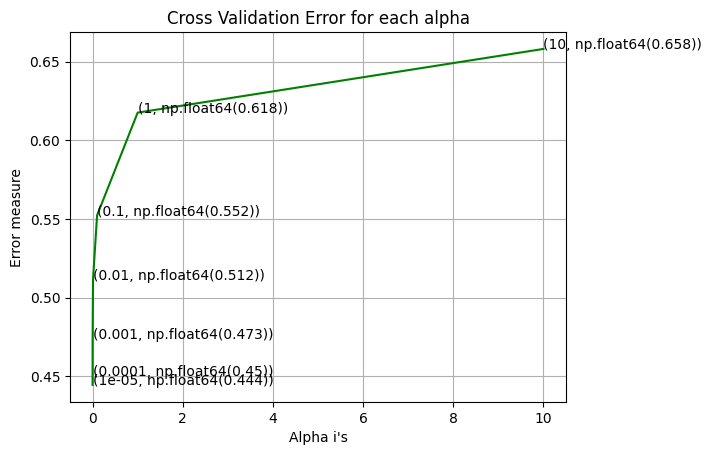

ValueError: could not convert string to float: 'who can give me some legal advice on internet payment '

In [296]:
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss', random_state=42)
    clf.fit(X_train_final,y_train[:258734])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train[:258734])
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss', random_state=42)
clf.fit(X_train, y_train[:258734])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train[:258734])

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train[:258734], predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# tried out or experimented ones

In [ ]:
# prompt: X_train_csc_min,X_cv_csc_min,X_test_csc_min=normalizerfun(X_train["csc_min"],X_cv["csc_min"],X_test["csc_min"]) do this for the all the columns in the data

for col in ['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio']:
  X_train[f'{col}_normalized'], X_cv[f'{col}_normalized'], X_test[f'{col}_normalized'] = normalizerfun(X_train[col], X_cv[col], X_test[col])

In [ ]:
data.columns

In [ ]:
colss=['id', 'qid1', 'qid2','cwc_min', 'cwc_max', 'csc_min','csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio']
for col in colss:
  X_train[f'{col}_normalized'], X_cv[f'{col}_normalized'], X_test[f'{col}_normalized'] = normalizerfun(X_train[col], X_cv[col], X_test[col])


In [ ]:
def normalizerfun(x, y, z, col_name):
    normalizer = Normalizer()
    x_trans = normalizer.fit_transform(x.values.reshape(-1, 1))
    y_trans = normalizer.fit_transform(y.values.reshape(-1, 1))
    z_trans = normalizer.fit_transform(z.values.reshape(-1, 1))
    print(f"Transformed {col_name}: shapes {x_trans.shape}, {y_trans.shape}, {z_trans.shape}")
    return x_trans, y_trans, z_trans


In [ ]:
colss=['id', 'qid1', 'qid2','cwc_min', 'cwc_max', 'csc_min','csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio']

for col in colss:
    xf'{col}_normalized', y, z = normalizerfun(X_train[col], X_cv[col], X_test[col], col)
    X_train[f'{col}_normalized'] = x.ravel()
    X_cv[f'{col}_normalized'] = y.ravel()
    X_test[f'{col}_normalized'] = z.ravel()


In [ ]:
x.shape

In [ ]:
from sklearn.preprocessing import Normalizer

colss = ['id', 'qid1', 'qid2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
         'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
         'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
         'fuzz_partial_ratio', 'longest_substr_ratio']

# Initialize dictionaries to store transformed arrays
X_train_trans = {}
X_cv_trans = {}
X_test_trans = {}

for col in colss:
    normalizer = Normalizer()
    x = normalizer.fit_transform(X_train[col].values.reshape(-1, 1)).ravel()
    y = normalizer.fit_transform(X_cv[col].values.reshape(-1, 1)).ravel()
    z = normalizer.fit_transform(X_test[col].values.reshape(-1, 1)).ravel()
    X_train_trans[col] = x
    X_cv_trans[col] = y
    X_test_trans[col] = z
    print(f"Transformed {col}: shapes {x.shape}, {y.shape}, {z.shape}")


In [ ]:
print(X_train_trans)
